# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.90'

In [6]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [7]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,c1_FI5_50X_8mW,103.234880,0.005702,1286.001150,0.005052,296.478423,1286.001200,417.617865,0.554783,1.837017,...,1.215873,1.207143,0.239525,0.003742,1.189655,1.175393,0.188876,0.001980,PseudoVoigtModel,PseudoVoigtModel
1,p2_FI5_50X_CRR_DiadFit,104.372170,0.004703,1283.278533,0.004115,532.010948,1283.278583,1463.788985,0.980560,2.418962,...,1.127971,1.053988,0.250966,0.003686,1.006263,1.028401,0.010079,0.001533,PseudoVoigtModel,PseudoVoigtModel
2,p3_FI4_50x_8mW_down,105.410997,0.007503,1281.253549,0.006891,360.187716,1281.253599,1060.811066,0.981475,2.706836,...,1.083929,1.116603,0.164748,0.005450,1.096774,1.021465,0.176670,0.002687,PseudoVoigtModel,PseudoVoigtModel
3,p3_FI4_50x_4mW_CRR_DiadFit,105.402445,0.015374,1281.255527,0.014099,126.104082,1281.255577,359.734932,0.921745,1.737262,...,1.047170,1.007463,0.086957,0.014619,1.175705,1.087518,0.285986,0.006603,PseudoVoigtModel,PseudoVoigtModel
4,p3_FI2_100x_8mW,105.391879,0.015568,1281.308044,0.014228,138.142011,1281.308094,378.380216,0.896408,1.914836,...,1.067308,1.015894,0.120670,0.012978,1.133858,1.113725,0.241828,0.007201,PseudoVoigtModel,PseudoVoigtModel


## First, get the metadata for this day

In [8]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'FG', 'Cap','window'],
 sort=True)
diad_meta[0]

'21 p3_FI4_50x_8mW_down.txt'

## Now get all the important information out of the metadata files

In [9]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:18<00:00,  2.16it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,p3_FI4_50x_8mW_down.txt,"February 6, 2024\n",February,6.0,7.992,60.0,3.0,50.0,"['0h', '3m', '2s']",1:31:27 PM\n,48687.0,1325.004
1,p3_FI2_100x_8mW.txt,"February 6, 2024\n",February,6.0,7.960,60.0,4.0,100.0,"['0h', '4m', '2s']",1:48:10 PM\n,49690.0,1325.004
2,p3_FI2_100x_12mW.txt,"February 6, 2024\n",February,6.0,11.966,60.0,4.0,100.0,"['0h', '4m', '1s']",1:53:47 PM\n,50027.0,1325.004
3,p3_FI3_100x_12mW.txt,"February 6, 2024\n",February,6.0,11.943,60.0,4.0,100.0,"['0h', '4m', '2s']",2:06:02 PM\n,50762.0,1325.004
4,p3_FI3_100x_15mW_300g.txt,"February 6, 2024\n",February,6.0,14.937,60.0,4.0,100.0,"['0h', '4m', '1s']",2:15:26 PM\n,51326.0,2300.156


## Then get a simple file name you can stitch with the spectra

In [10]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'p3_FI4_50x_8mW_down'

## Now get filename from spectra into same form as metadata

In [11]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
c1_FI5_50X_8mW


In [12]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,c1_FI5_50X_8mW,103.234880,0.005702,1286.001150,0.005052,296.478423,1286.001200,417.617865,0.554783,1.837017,...,February,6.0,8.006,60.0,4.0,50.0,"['0h', '4m', '2s']",3:25:19 PM\n,55519.0,1325.004
1,p3_FI4_50x_8mW_down,105.410997,0.007503,1281.253549,0.006891,360.187716,1281.253599,1060.811066,0.981475,2.706836,...,February,6.0,7.992,60.0,3.0,50.0,"['0h', '3m', '2s']",1:31:27 PM\n,48687.0,1325.004
2,p3_FI2_100x_8mW,105.391879,0.015568,1281.308044,0.014228,138.142011,1281.308094,378.380216,0.896408,1.914836,...,February,6.0,7.960,60.0,4.0,100.0,"['0h', '4m', '2s']",1:48:10 PM\n,49690.0,1325.004
3,p3_FI2_100x_12mW,105.388660,0.012104,1281.303224,0.011324,199.121232,1281.303274,564.841731,0.938138,2.270415,...,February,6.0,11.966,60.0,4.0,100.0,"['0h', '4m', '1s']",1:53:47 PM\n,50027.0,1325.004
4,p3_FI3_100x_12mW,105.395257,0.005985,1281.301617,0.005602,660.338710,1281.301667,1927.823298,0.954793,4.598171,...,February,6.0,11.943,60.0,4.0,100.0,"['0h', '4m', '2s']",2:06:02 PM\n,50762.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [13]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

## If you have SO2, now is the time to calculate the molar proportion of SO2

In [14]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    SO2_ratio=pf.calculate_CO2_SO2_ratio(peak_area_SO2=df_combo_sec_phase['Peak_Area_SO2'], 
peak_area_diad1=df_combo_sec_phase['Diad1_Voigt_Area'], peak_area_diad2=df_combo_sec_phase['Diad2_Voigt_Area'],
wavelength=532.067, T_K=37+273.15, efficiency_SO2=1, efficiency_CO2=0.5, 
sigma_SO2=4.03, sigma_CO2_v1=0.8, sigma_CO2_v2=1.23)
    df_combo_sec_phase['SO2_mol_ratio']=SO2_ratio['SO2']

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [15]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.2401100027287226e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,time,preferred_values,lower_values,upper_values
0,c1_FI5_50X_8mW,0.101259,0.004451,0.002309,0.003806,103.005805,0.005827,0.001256,0.005702,8.006,...,60.0,4.0,50.0,"['0h', '4m', '2s']",3:25:19 PM\n,55519.0,55519.0,0.997781,0.997769,0.997793
1,p3_FI4_50x_8mW_down,1.001575,0.002627,0.002080,0.001604,105.181617,0.007607,0.001349,0.007503,7.992,...,60.0,3.0,50.0,"['0h', '3m', '2s']",1:31:27 PM\n,48687.0,48687.0,0.997824,0.997811,0.997837
2,p3_FI2_100x_8mW,0.996049,0.004617,0.004330,0.001603,105.161564,0.015590,0.001320,0.015568,7.960,...,60.0,4.0,100.0,"['0h', '4m', '2s']",1:48:10 PM\n,49690.0,49690.0,0.997815,0.997802,0.997827
3,p3_FI2_100x_12mW,0.995071,0.003743,0.003383,0.001602,105.158047,0.012148,0.001311,0.012104,11.966,...,60.0,4.0,100.0,"['0h', '4m', '1s']",1:53:47 PM\n,50027.0,50027.0,0.997812,0.997799,0.997824
4,p3_FI3_100x_12mW,0.996727,0.002332,0.001694,0.001603,105.164009,0.006111,0.001296,0.005985,11.943,...,60.0,4.0,100.0,"['0h', '4m', '2s']",2:06:02 PM\n,50762.0,50762.0,0.997806,0.997794,0.997818


In [16]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.2401100027287226e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,time,preferred_values,lower_values,upper_values
0,c1_FI5_50X_8mW,0.101259,0.004451,0.002309,0.003806,103.005805,0.005827,0.001256,0.005702,8.006,...,60.0,4.0,50.0,"['0h', '4m', '2s']",3:25:19 PM\n,55519.0,55519.0,0.997781,0.997769,0.997793
1,p3_FI4_50x_8mW_down,1.001575,0.002627,0.002080,0.001604,105.181617,0.007607,0.001349,0.007503,7.992,...,60.0,3.0,50.0,"['0h', '3m', '2s']",1:31:27 PM\n,48687.0,48687.0,0.997824,0.997811,0.997837
2,p3_FI2_100x_8mW,0.996049,0.004617,0.004330,0.001603,105.161564,0.015590,0.001320,0.015568,7.960,...,60.0,4.0,100.0,"['0h', '4m', '2s']",1:48:10 PM\n,49690.0,49690.0,0.997815,0.997802,0.997827
3,p3_FI2_100x_12mW,0.995071,0.003743,0.003383,0.001602,105.158047,0.012148,0.001311,0.012104,11.966,...,60.0,4.0,100.0,"['0h', '4m', '1s']",1:53:47 PM\n,50027.0,50027.0,0.997812,0.997799,0.997824
4,p3_FI3_100x_12mW,0.996727,0.002332,0.001694,0.001603,105.164009,0.006111,0.001296,0.005985,11.943,...,60.0,4.0,100.0,"['0h', '4m', '2s']",2:06:02 PM\n,50762.0,50762.0,0.997806,0.997794,0.997818


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [17]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_February 6, 2024_fitted_2024-06-18.xlsx


## This helps visualize the errors on each spectra 

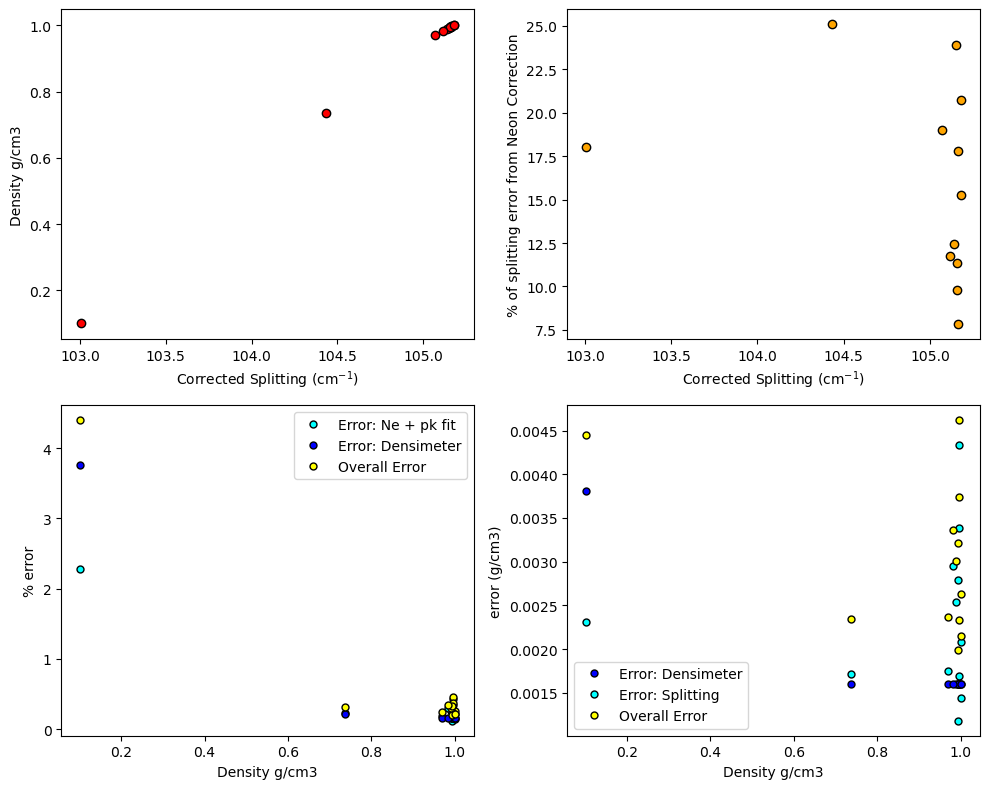

In [18]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

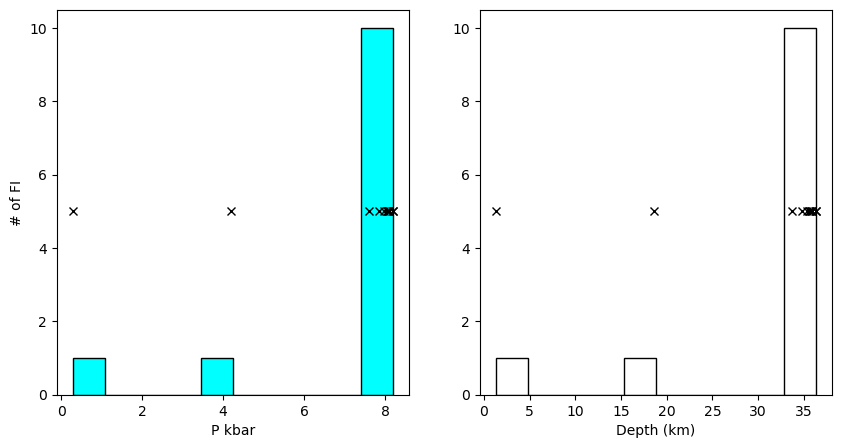

In [19]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')